# Trenowanie sieci neuronowej PyTorch

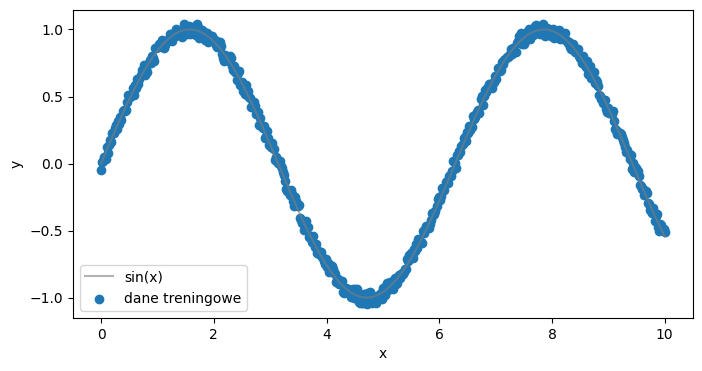

In [1]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output

torch.manual_seed(1234)

# DANE 
x = torch.linspace(0,10,500).view(-1,1)
y = torch.sin(x)
y = y + 0.1*(torch.rand(500).view(-1,1)-0.5)

plt.figure(figsize=(8,4))
plt.plot(x, torch.sin(x).view(-1,1), color="tab:grey", alpha=0.6, label="sin(x)")
plt.scatter(x,y, label="dane treningowe")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## klasyczna sieć neuronowa

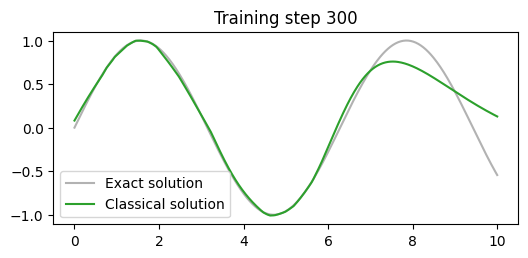

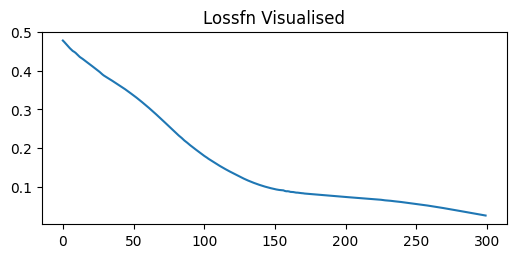

In [2]:
class SinusEstimator(torch.nn.Module):

    def __init__(self, N_INPUT: int, N_OUTPUT: int):
        super(SinusEstimator,self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(N_INPUT, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,16),
            torch.nn.Tanh(),
            torch.nn.Linear(16,N_OUTPUT)
        )


    def forward(self, x):
        x = self.layers(x)
        return x

model = SinusEstimator(1,1)

learning_rate=0.001
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

losses = []

def callback(model, loss):
    losses.append(loss.item())

    clear_output(wait=True)
    prediction = model(x).detach()
    plt.figure(figsize=(6,2.5))
    plt.plot(x[:,0].detach(), torch.sin(x)[:,0].detach(), label="Exact solution", color="tab:grey", alpha=0.6)
    plt.plot(x[:,0].detach(), prediction[:,0], label="Classical solution", color="tab:green")
    plt.title(f"Training step {len(losses)}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,2.5))
    plt.title('Lossfn Visualised')
    plt.plot(losses)
    plt.show()


def train(X,Y, model, optimiser, epochs, lossfn, callback = None):
    for epoch in range(epochs):
        model.train()
        prediction = model(X)
        loss = lossfn(prediction, Y)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        model.eval()
        if callback != None:
            callback(model, loss)

x_train = x.requires_grad_(True)

train(x_train, y, model, optimiser, 300, criterion, callback)


Sprawdź czy modyfikacja funkcji straty pomoze polepszyć wynik

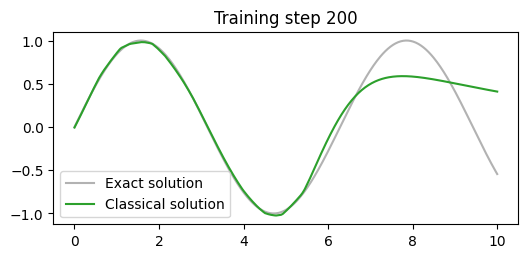

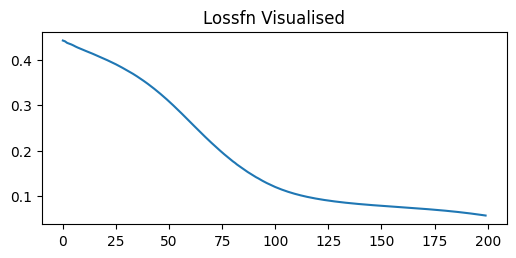

In [3]:
def mse(y, y_pred) -> torch.Tensor:
    return torch.mean((y-y_pred)**2)

def special_loss_fn(y, y_pred) -> torch.Tensor:
    return mse(y, y_pred) + torch.mean((y_pred - torch.sin(x))**2)

model2 = SinusEstimator(1,1)

learning_rate=0.001
optimiser = torch.optim.Adam(model2.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
losses = []

train(x_train, y, model2, optimiser, 200, special_loss_fn, callback)